In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

import pickle
import warnings
warnings.filterwarnings('ignore')

In [75]:
df=pd.read_csv("female_foeticide_risk.csv")

In [76]:
df.head(10)

,district_name,state,literacy_rate_female,literacy_rate_male,sex_ratio,avg_household_income,poverty_index,education_expenditure_per_capita,female_infant_mortality_rate,access_to_health_facilities,employment_rate_female,social_awareness_programs,risk_level
0,Darbhanga,Bihar,66.73,75.26,892.0,26906.0,0.524,3769.2,28.2,63.3,44.9,3.0,Medium
1,Bharatpur,Rajasthan,81.35,77.90,851.0,18326.0,0.352,1203.2,23.2,86.2,56.2,16.0,Medium
2,Patna,Bihar,65.37,85.05,871.0,20108.0,0.332,2712.6,36.5,39.8,33.8,16.0,Medium
3,Bhavnagar,Gujarat,56.16,84.49,968.0,26189.0,0.397,2345.1,20.3,82.2,52.7,1.0,Medium
4,Junagadh,Gujarat,53.57,89.31,933.0,26398.0,0.906,1950.9,28.7,62.4,36.7,17.0,High
5,Lucknow,Uttar Pradesh,58.79,80.53,914.0,15001.0,0.596,3523.8,33.7,76.2,28.2,14.0,Medium
6,Ambala,Haryana,51.51,77.98,921.0,20123.0,0.415,2664.9,25.4,89.9,42.2,5.0,Medium
7,Bharatpur,Rajasthan,56.80,78.02,920.0,18968.0,0.919,3070.2,21.2,97.6,24.9,15.0,High
8,Kolkata,West Bengal,63.66,85.76,975.0,21102.0,0.092,3402.2,31.9,48.7,42.5,11.0,Low
9,Balasore,Odisha,81.00,84.55,974.0,21939.0,0.887,2810.5,17.7,70.2,31.4,6.0,High


In [40]:
df.shape

(1000, 13)

In [8]:
df.describe()

,literacy_rate_female,literacy_rate_male,sex_ratio,avg_household_income,poverty_index,education_expenditure_per_capita,female_infant_mortality_rate,access_to_health_facilities,employment_rate_female,social_awareness_programs
count,990.000000,979.000000,993.000000,993.000000,987.000000,991.000000,995.000000,992.000000,989.000000,991.000000
mean,65.329545,79.828458,923.910373,18088.021148,0.487788,2507.454490,29.323216,69.646270,35.476239,9.804238
std,10.048246,5.106745,49.350060,5012.453343,0.292999,796.363711,10.009641,18.455596,10.106227,5.726072
min,32.490000,62.700000,763.000000,5000.000000,0.001000,500.000000,5.000000,10.000000,5.000000,0.000000
25%,58.550000,76.425000,892.000000,14653.000000,0.238000,1953.000000,22.300000,57.150000,28.500000,5.000000
50%,65.285000,79.830000,925.000000,18155.000000,0.485000,2490.900000,29.400000,70.600000,35.500000,10.000000
75%,72.217500,83.260000,957.000000,21477.000000,0.738500,3043.600000,36.350000,83.500000,42.000000,15.000000
max,94.720000,94.960000,1050.000000,31996.000000,0.999000,5175.400000,59.100000,100.000000,68.000000,19.000000


In [7]:
df.isnull().sum()

district_name                       16
state                               10
literacy_rate_female                10
literacy_rate_male                  21
sex_ratio                            7
avg_household_income                 7
poverty_index                       13
education_expenditure_per_capita     9
female_infant_mortality_rate         5
access_to_health_facilities          8
employment_rate_female              11
social_awareness_programs            9
risk_level                           0
dtype: int64

In [66]:
# Imputing the null values :
df.loc[df['literacy_rate_female'].isnull(),'literacy_rate_female']=df["literacy_rate_female"].median() # We have imputed the null values with the median

In [10]:
df.literacy_rate_female.isnull().sum()

0

In [11]:
df.loc[df['literacy_rate_male'].isnull(),'literacy_rate_male']=df["literacy_rate_male"].median()

In [12]:
df.literacy_rate_male.isnull().sum()

0

In [13]:
df.loc[df['sex_ratio'].isnull(),'sex_ratio']=df["sex_ratio"].median()

In [14]:
df.sex_ratio.isnull().sum()

0

In [27]:
df.loc[df['avg_household_income'].isnull(),'avg_household_income']=df["avg_household_income"].mean()

In [28]:
df.avg_household_income.isnull().sum()

0

In [20]:
df.loc[df['district_name'].isnull(),'district_name']='0'

In [21]:
df.district_name.isnull().sum()

0

In [22]:
df.loc[df['state'].isnull(),'state']='0'

In [23]:
df.state.isnull().sum()

0

In [29]:
df.loc[df['poverty_index'].isnull(),'poverty_index']=df["poverty_index"].mean()

In [30]:
df.poverty_index.isnull().sum()

0

In [41]:
df['education_expenditure_per_capita'].fillna(0.00, inplace=True)

In [42]:
df.education_expenditure_per_capita.isnull().sum()

0

In [43]:
df.loc[df['female_infant_mortality_rate'].isnull(),'female_infant_mortality_rate']=df["female_infant_mortality_rate"].median()

In [44]:
df.female_infant_mortality_rate.isnull().sum()

0

In [49]:
df['access_to_health_facilities'].fillna(0.00, inplace=True)

In [50]:
df.access_to_health_facilities.isnull().sum()

0

In [51]:
df.loc[df['employment_rate_female'].isnull(),'employment_rate_female']=df["employment_rate_female"].median()

In [52]:
df.employment_rate_female.isnull().sum()

0

In [53]:
df['social_awareness_programs'].fillna(0.00, inplace=True)

In [54]:
df.isnull().sum()

district_name                       0
state                               0
literacy_rate_female                0
literacy_rate_male                  0
sex_ratio                           0
avg_household_income                0
poverty_index                       0
education_expenditure_per_capita    0
female_infant_mortality_rate        0
access_to_health_facilities         0
employment_rate_female              0
social_awareness_programs           0
risk_level                          0
dtype: int64

In [55]:
df.columns

Index(['district_name', 'state', 'literacy_rate_female', 'literacy_rate_male',
       'sex_ratio', 'avg_household_income', 'poverty_index',
       'education_expenditure_per_capita', 'female_infant_mortality_rate',
       'access_to_health_facilities', 'employment_rate_female',
       'social_awareness_programs', 'risk_level'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   district_name                     1000 non-null   object 
 1   state                             1000 non-null   object 
 2   literacy_rate_female              1000 non-null   float64
 3   literacy_rate_male                1000 non-null   float64
 4   sex_ratio                         1000 non-null   float64
 5   avg_household_income              1000 non-null   float64
 6   poverty_index                     1000 non-null   float64
 7   education_expenditure_per_capita  1000 non-null   float64
 8   female_infant_mortality_rate      1000 non-null   float64
 9   access_to_health_facilities       1000 non-null   float64
 10  employment_rate_female            1000 non-null   float64
 11  social_awareness_programs         1000 non-null   float64
 12  risk_le

In [61]:
df.risk_level.value_counts()

risk_level
Low       334
Medium    333
High      333
Name: count, dtype: int64

### Data Exploration

<Axes: xlabel='employment_rate_female'>

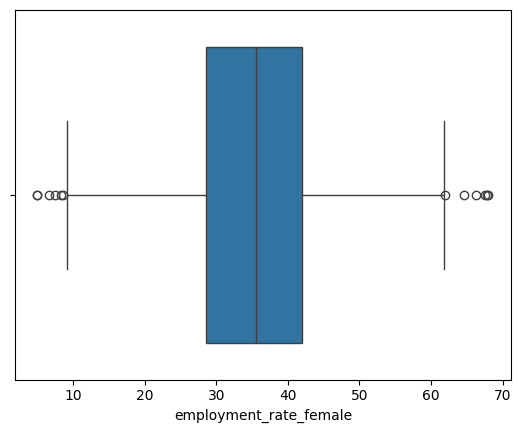

In [57]:
sns.boxplot(x=df.employment_rate_female ,orient='h')

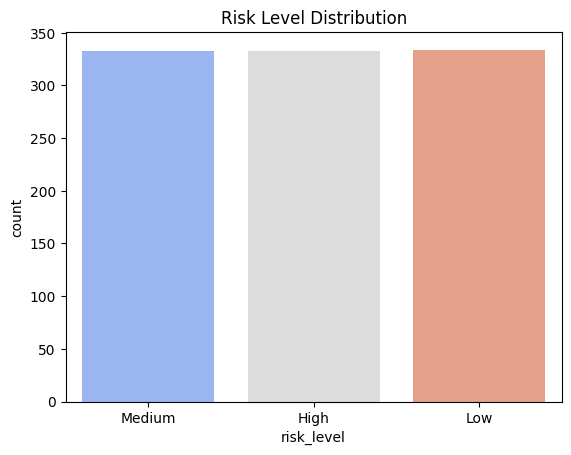

risk_level
Low       0.334
Medium    0.333
High      0.333
Name: proportion, dtype: float64


In [63]:
sns.countplot(x='risk_level', data=df, palette='coolwarm')
plt.title("Risk Level Distribution")
plt.show()

print(df['risk_level'].value_counts(normalize=True))

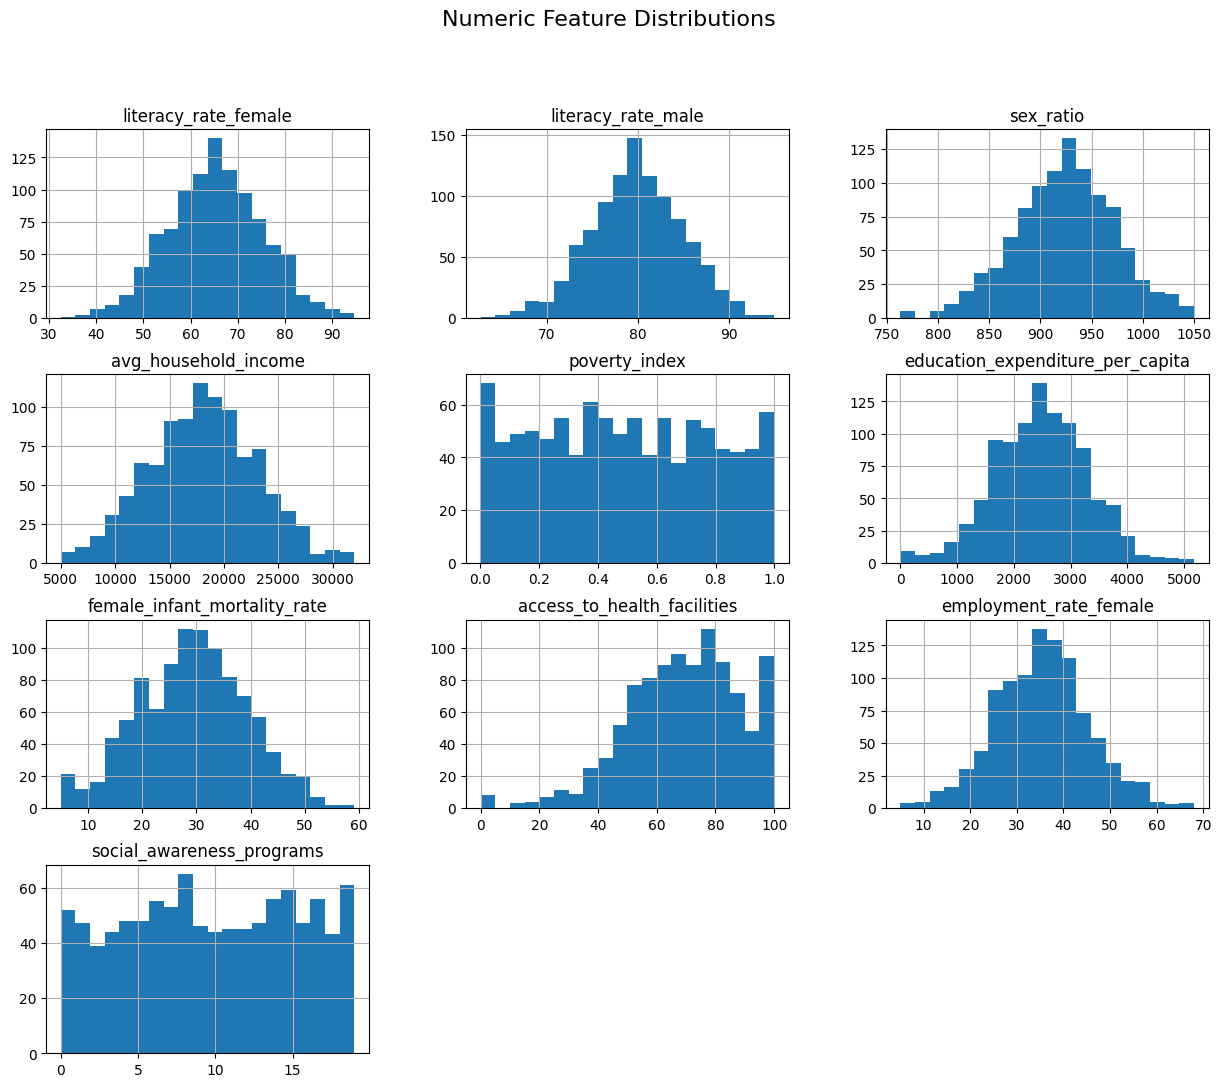

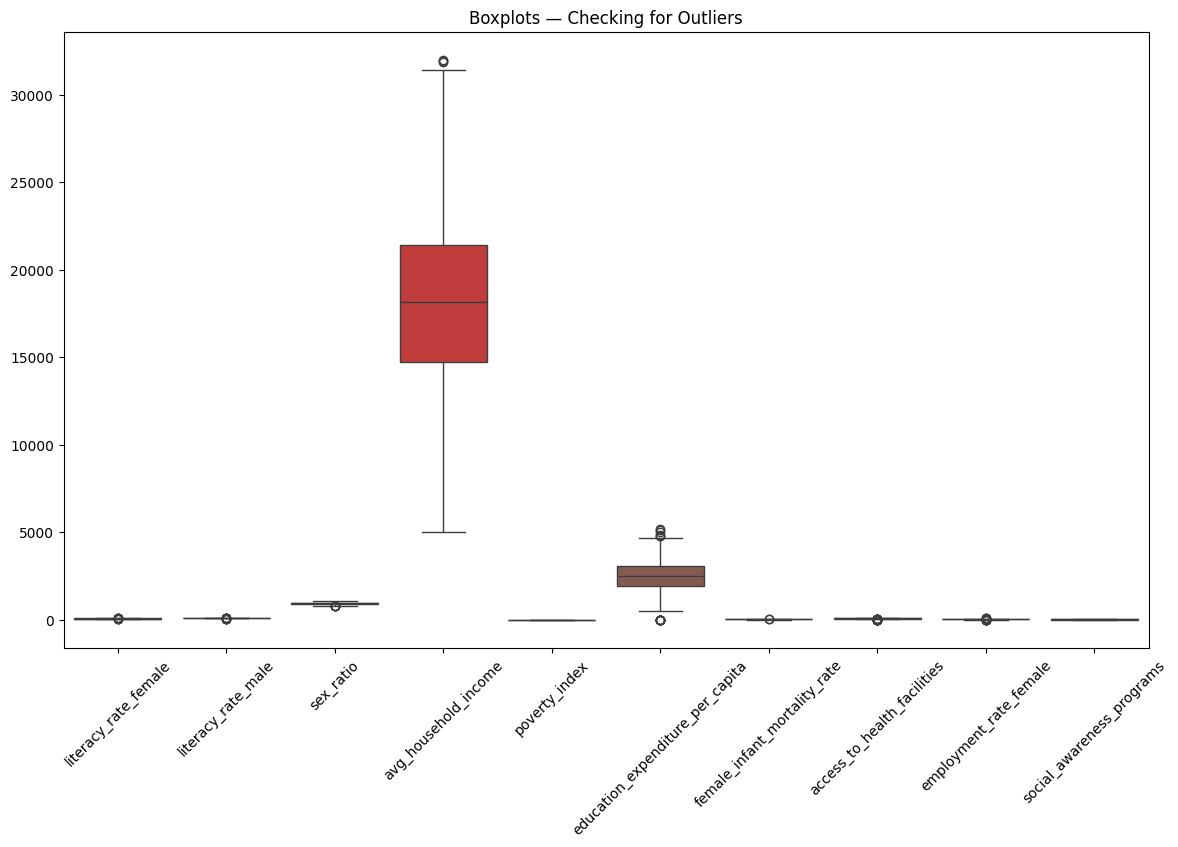

In [64]:
num_cols = [
    'literacy_rate_female','literacy_rate_male','sex_ratio','avg_household_income',
    'poverty_index','education_expenditure_per_capita','female_infant_mortality_rate',
    'access_to_health_facilities','employment_rate_female','social_awareness_programs'
]

# Histograms
df[num_cols].hist(figsize=(15,12), bins=20, color='#1f77b4')
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.show()

# Boxplots (to see outliers)
plt.figure(figsize=(14,8))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplots — Checking for Outliers")
plt.show()

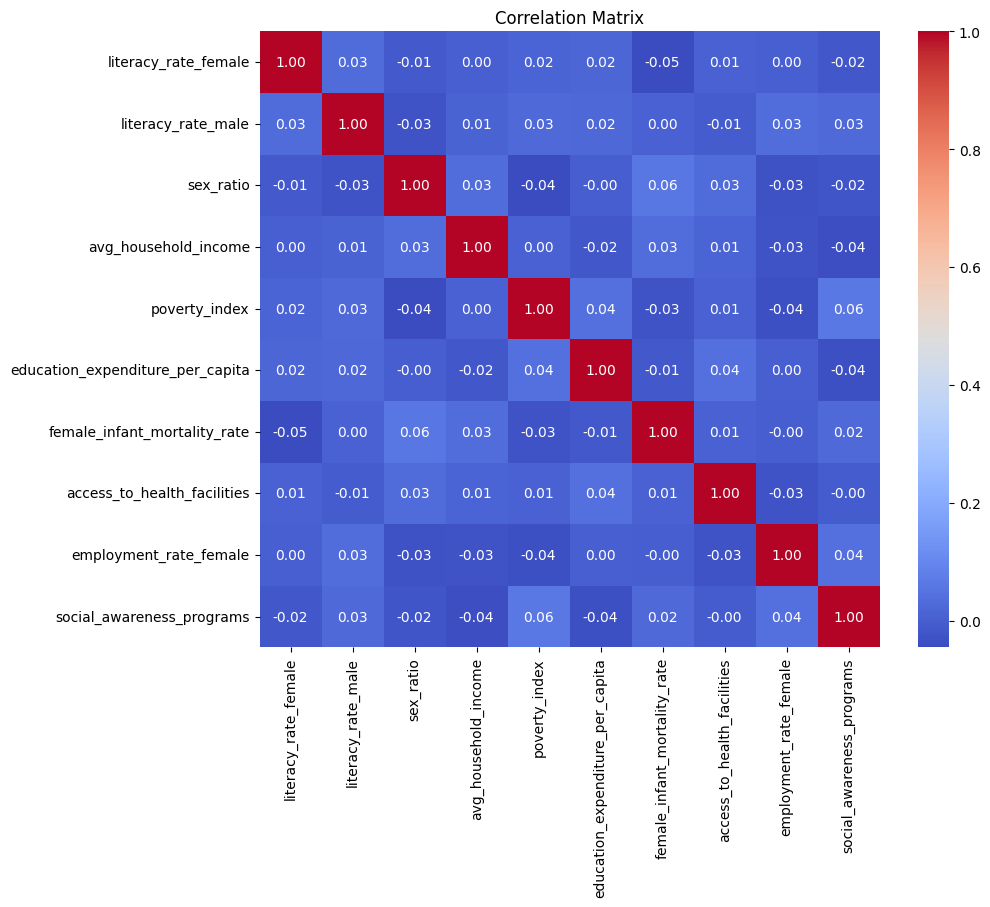

In [65]:
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

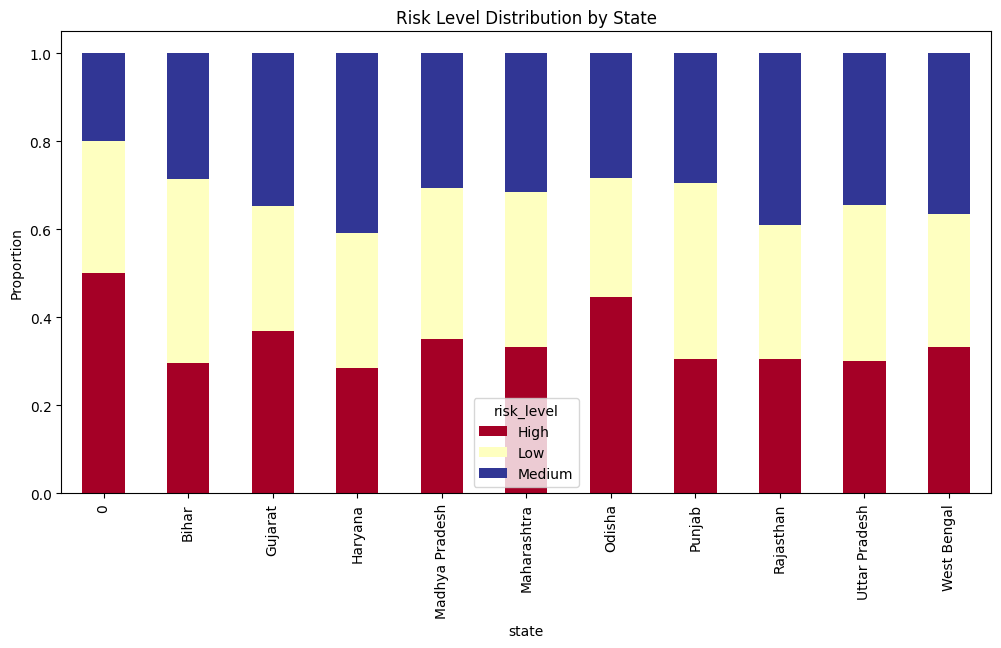

In [67]:
state_risk = df.groupby('state')['risk_level'].value_counts(normalize=True).unstack().fillna(0)
state_risk.plot(kind='bar', stacked=True, figsize=(12,6), colormap='RdYlBu')
plt.title("Risk Level Distribution by State")
plt.ylabel("Proportion")
plt.show()

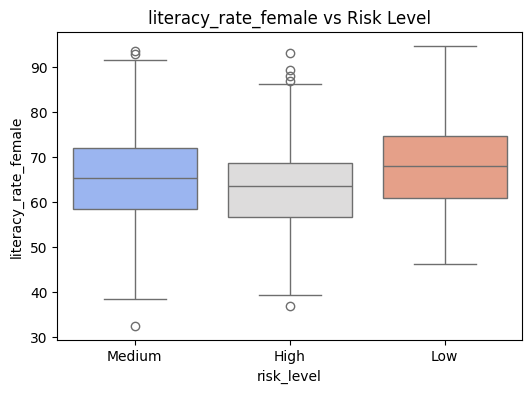

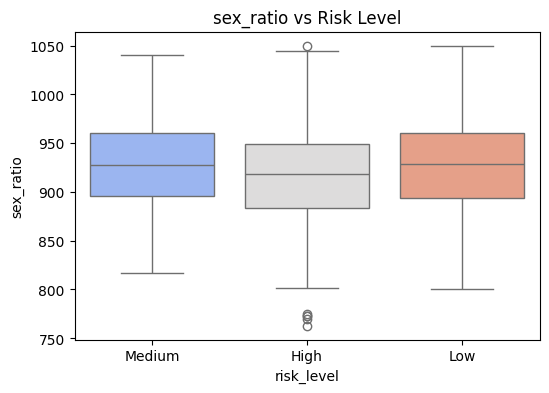

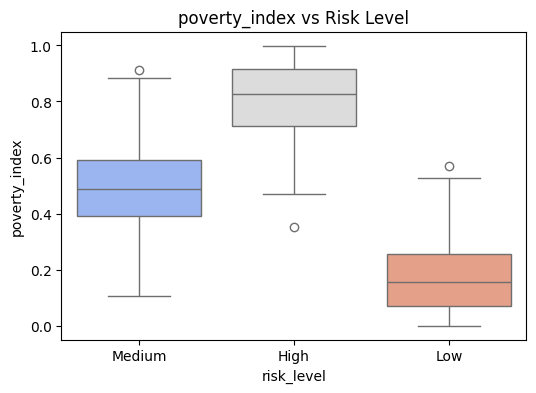

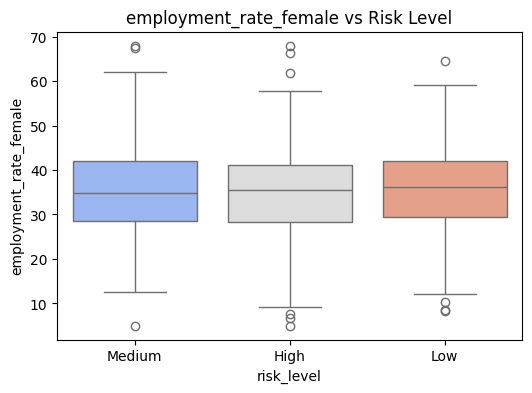

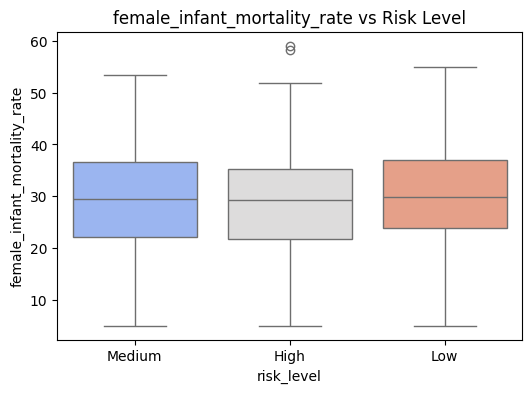

In [68]:
features_to_plot = ['literacy_rate_female','sex_ratio','poverty_index','employment_rate_female','female_infant_mortality_rate']

for feat in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='risk_level', y=feat, data=df, palette='coolwarm')
    plt.title(f"{feat} vs Risk Level")
    plt.show()

# Feature Engineering

In [105]:

df['literacy_gap'] = df['literacy_rate_male'] - df['literacy_rate_female']
df['female_lit_ratio'] = df['literacy_rate_female'] / (df['literacy_rate_male'] + 1e-6)
df['log_income'] = np.log1p(df['avg_household_income'])

# Map target to integers
target_map = {'Low':0, 'Medium':1, 'High':2}
df['y'] = df['risk_level'].map(target_map)

In [106]:
# Feature Lists

num_feats = [
    'literacy_rate_female','literacy_rate_male','sex_ratio','log_income',
    'poverty_index','education_expenditure_per_capita','female_infant_mortality_rate',
    'access_to_health_facilities','employment_rate_female','social_awareness_programs',
    'literacy_gap','female_lit_ratio'
]
cat_feats = ['state']

X = df[num_feats + cat_feats]
y = df['y']

In [107]:
# Preprocessing Pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# Numeric: median impute + standard scaling
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

# Categorical: most frequent impute + one-hot encode
cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_feats),
    ('cat', cat_pipeline, cat_feats)
])

In [108]:
# Modeling Pipeline (SMOTE + XGBoost)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

clf = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1
)

pipeline = ImbPipeline(steps=[
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', clf)
])

In [109]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [110]:
# Fit Model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['literacy_rate_female',
                                                   'literacy_rate_male',
                                                   'sex_ratio', 'log_income',
                                                   'poverty_index',
                                                   'education_expenditure_per_capita',
                                                   'female_infant_mortality_rate',
                                                   'access_to_health_facilities',
                                                   'employment_r...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [111]:
# cross-validated predictions
from sklearn.model_selection import StratifiedKFold, cross_val_predict
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(pipeline, X, y, cv=skf, method='predict', n_jobs=1)

In [112]:
# Predictions & Evaluation of the model
from sklearn.metrics import f1_score, classification_report, confusion_matrix

y_pred = pipeline.predict(X_test)

print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Macro F1 Score: 0.8195386702849389

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        67
           1       0.74      0.72      0.73        67
           2       0.82      0.85      0.84        66

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

Confusion Matrix:
 [[60  7  0]
 [ 7 48 12]
 [ 0 10 56]]


In [113]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1_macro')
print("5-fold CV Macro F1 Score:", scores)
print("Average Macro F1 Score:", scores.mean())


5-fold CV Macro F1 Score: [0.84739332 0.8703398  0.8795991  0.86941441 0.82361883]
Average Macro F1 Score: 0.8580730930268101


In [114]:
# Examples of  new data
X_new = pd.DataFrame([{
    'literacy_rate_female': 75.0,
    'literacy_rate_male': 85.0,
    'sex_ratio': 950,
    'log_income': 2.5,
    'poverty_index': 0.2,
    'education_expenditure_per_capita': 500,
    'female_infant_mortality_rate': 35,
    'access_to_health_facilities': 0.8,
    'employment_rate_female': 0.6,
    'social_awareness_programs': 10,
    'literacy_gap': 10,
    'female_lit_ratio': 0.88,
    'state': 'Karnataka'
}])

In [115]:
y_new_pred = pipeline.predict(X_new)
print("Predicted class:", y_new_pred[0])

Predicted class: 0


## Here we can see the with the new data values the predicted class is 0 which means "low risk".

In [116]:
import joblib

# For Saving the pickel file.
joblib.dump(pipeline, "final_model.pkl")

['final_model.pkl']